In [1]:
import pandas as pd
import numpy as np
import missingno as msno

# Replacing NaN Values

In [5]:
df = pd.read_csv('train.csv')

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Mean/Median Imputation

In [27]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
df['Age'].fillna((df['Age'].median()), inplace=True)

### Replacing with 0 or -1

In [106]:
df['Age'].fillna(value=0, inplace=True)

### Replacing with a random number. Random sampling imputation

In [40]:
rand = random.randint(1, 120)
df['Age'].fillna(value=rand, inplace=True)

### Indicating Missingness

In [44]:
df['Has_Age'] = np.where(df['Age'].isnull(), 0, 1)

### Imputation of NA by values at the end of the distribution

In [52]:
df['Age'].fillna(df.Age.mean() + df.Age.std()*3, inplace=True)

In [55]:
df['Age'].value_counts()

73.27861    177
24.00000     30
22.00000     27
18.00000     26
28.00000     25
30.00000     25
19.00000     25
21.00000     24
25.00000     23
36.00000     22
29.00000     20
35.00000     18
26.00000     18
32.00000     18
27.00000     18
31.00000     17
16.00000     17
23.00000     15
34.00000     15
33.00000     15
20.00000     15
39.00000     14
40.00000     13
42.00000     13
17.00000     13
45.00000     12
38.00000     11
4.00000      10
50.00000     10
2.00000      10
           ... 
0.83000       2
30.50000      2
0.75000       2
57.00000      2
55.00000      2
70.00000      2
10.00000      2
32.50000      2
71.00000      2
63.00000      2
28.50000      2
45.50000      2
40.50000      2
59.00000      2
14.50000      1
0.67000       1
12.00000      1
0.92000       1
74.00000      1
34.50000      1
70.50000      1
36.50000      1
24.50000      1
66.00000      1
80.00000      1
55.50000      1
53.00000      1
20.50000      1
23.50000      1
0.42000       1
Name: Age, Length: 89, d

### Replacing with values of your choosing based on an assumption.

In [58]:
df['Age'].fillna(value='My Unique Value', inplace=True)

In [59]:
df['Age'].value_counts()

My Unique Value    177
24.0                30
22.0                27
18.0                26
28.0                25
19.0                25
30.0                25
21.0                24
25.0                23
36.0                22
29.0                20
27.0                18
32.0                18
26.0                18
35.0                18
31.0                17
16.0                17
23.0                15
33.0                15
34.0                15
20.0                15
39.0                14
17.0                13
42.0                13
40.0                13
45.0                12
38.0                11
50.0                10
4.0                 10
2.0                 10
                  ... 
28.5                 2
0.83                 2
10.0                 2
32.5                 2
30.5                 2
55.0                 2
57.0                 2
59.0                 2
63.0                 2
64.0                 2
45.5                 2
70.0                 2
71.0       

### Using regression to impute attribute missing values

# Feature Scaling

In [134]:
df = pd.read_csv('train.csv')

In [135]:
x = df[['Age']]
x.shape

(891, 1)

### Standard Scaler

In [136]:
# This does the same thing as the following code (data - data.mean()) / data.std()
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

### MinMax Scaler

In [138]:
# This does the same as the following code (data – data.min()) / (data.max() – data.min())
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

### Robust Scaler

In [140]:
# This does (data - data.median()) / IQR)
from sklearn.preprocessing import RobustScaler
x = RobustScaler().fit_transform(x)

# Engineering Outliers in Numerical Variables

In [156]:
df = pd.read_csv('train.csv')

### Mean/median imputation or random sampling
If we have reasons to believe that the outliers are due to mechanical error or problems during measurement. This means, if the outliers are in nature similar to missing data, then any of the methods discussed for missing data can be applied to replace outliers. Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### Identify outliers with quantiles

In [ ]:
q25 = logprice.quantile(0.25)
q75 = logprice.quantile(0.75)
IQR = q75 - q25
    
# Any value higher than ulimit or below llimit is an outlier
ulimit = q75 + 1.5*IQR
llimit = q25 - 1.5*IQR

### Identify outliers with mean

In [ ]:
# Using the mean and standard deviation to detect outliers should only be done
# with data that is not very skewed
ulimit = np.mean(logprice) + 3*np.std(logprice)
llimit = np.mean(logprice) - 3*np.std(logprice)

### Discretization

In [90]:
# Find the min and max values
min_value = int(np.floor(df['Age'].min()))
max_value = int(np.ceil(df['Age'].max()))

# Get the width of each bucket
inter_value = df['Age'] / 100

# Create the intervals (list of buckets)
intervals = [i for i in range(min_value, max_value)]

# Optionally create labels
labels = [f'Bin_{i}' for i in range(1, len(intervals))]

# Create new feature with pd.cut
df['discrete_price'] = pd.cut(x=logprice, bins=intervals, labels=labels, include_lowest=True)

### Trimming

In [157]:
# Let's first remove any missing values
df['Age'].fillna((df['Age'].mean()), inplace=True)
# Get the outlier values
index_of_low = df[df.Age > 70].index
# Drop them
df = df.drop(index_of_low, axis=0)

### Winsorization (top coding bottom coding)

In [164]:
# Get the value of the 99th percentile
ulimit = np.percentile(df.Age.values, 99)

# Get the value of the 1st percentile (bottom 1%)
llimit = np.percentile(df.Age.values, 1)

# Create a copy of the age variable
df['Age_truncated'] = df.Age.copy()

# Replace all values above ulimit with value of ulimit
df['Age_truncated'].loc[df.Age > ulimit] = ulimit

# Replace all values below llimit with value of llimit
df['Age_truncated'].loc[df.Age < llimit] = llimit

/Users/michaelabeshera/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Rank Transformation (when the distances don’t matter so much)

In [ ]:
from scipy.stats import rankdata
# This is like sorting the variable and then assigning an index starting from 1 to each value
rankdata(titanic.Age, method='dense')

# Engineering Labels, Categorical Variables

In [38]:
df = pd.read_csv('train.csv')

In [32]:
df['Age'].fillna((df['Age'].median()), inplace=True)

In [33]:
x = df[['Age']]

In [34]:
x['Age'].nunique()

88

### One-Hot-Encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(categories='auto').fit_transform(x)

In [36]:
a = one.toarray()

In [37]:
a.shape

(891, 88)

In [163]:
df_two = pd.DataFrame(a)
df_two[1].value_counts()

0.0    890
1.0      1
Name: 1, dtype: int64

In [164]:
df.shape

(891, 12)

### Pandas Get Dummies

In [220]:
# pd.get_dummies(x)
pd.get_dummies(df['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


### Target Guided Ordinal Encoding

### Mean Encoding

In [219]:
df['Mean Encoding'] = df['Survived'].groupby(df['Pclass']).mean()

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,Mean Encoding
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.629630,0.629630
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.472826,0.472826
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.242363,0.242363
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


### Probability Ratio Encoding

### Weight of Evidence Encoding

### Label Encoding

#### Cat.codes

In [12]:
# You can use cat.codes to convert the variable into a binary one
df['Sex'] = df['Sex'].astype('category')
# Cat.codes only works if the dtype is 'category'
df['Sex'].cat.codes

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

#### Factorize

In [61]:
df = pd.read_csv('train.csv')

In [40]:
x = df['Sex']

In [62]:
label, val = pd.factorize(df['Sex'])

In [67]:
val

Index(['male', 'female'], dtype='object')

In [66]:
label

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [68]:
type(label)

numpy.ndarray

In [69]:
df['Something'] = label

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Something
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Tip: I would use pandas factorize or cat.codes to label encode variables compared with scikits label encoder

- The factorize method in pandas numbers the classes in order of appearance
- cat.codes organizes the list in...

### Binary Encoding

In [186]:
# You can use cat.codes to convert the variable into a binary one
df['Sex'] = df['Sex'].astype('category')
df['Sex'].cat.codes

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [189]:
# You can use replace
df['Sex_Binary'] = np.where(df['Sex'].isin(['Male','Female']), 1, 0)

# Engineering Dates

In [49]:
df = pd.read_csv('news_sample.csv')

In [45]:
time = pd.to_datetime(df['time'])

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr

In [52]:
# Pandas comes with packed with datetime properties which you could check out here: https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties
# You can even get a column with microseconds.
df['Month'] = time.dt.month
df['Day'] = time.dt.day
df['Hour'] = time.dt.hour
df['Minute'] = time.dt.minute
df['Seconds'] = time.dt.second

In [53]:
# Create is weekened column
df['is_weekend'] = np.where(df['Day'].isin([5,6]), 1, 0)

# Engineering Mixed Variables

We've seen that mixed variables are those which values contain both numbers and labels.

How can we engineer this type of variable to use it in machine learning?

What we need to do in these cases is extract the categorical part in one variable, and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one.

There is not much to cover here besides giving one fake example

In [64]:
data = ['Apple', 'Banana', '2', '6']

In [65]:
lst_strings = []
lst_int = []

In [67]:
for i in data:
    if i == 'Apple':
        lst_strings.append(i)
    elif i == 'Banana':
        lst_strings.append(i)
    if i == '2':
        lst_int.append(int(i))
    elif i == '6':
        lst_int.append(int(i))

# Engineering rare labels in categorical variables

In [78]:
df.shape

(891, 12)

In [129]:
df = pd.read_csv('train.csv')

In [130]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Lets say there is a small % of values within a large group of categories in a feature, you can grab them and call them "other" in order to reduce the values in the dataset and potentially reduce overfitting.

These observations can be re-categorised by:

- Replacing the rare label by most frequent label
- Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

### Replacing the rare label by most frequent label

In [132]:
df.loc[df['Age'].value_counts()[df['Age']].values > 28, 'Age'] = "RARE_VALUE"

In [133]:
df['Age'].values

array([22.0, 38.0, 26.0, 35.0, 35.0, 'RARE_VALUE', 54.0, 2.0, 27.0, 14.0,
       4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 'RARE_VALUE', 31.0,
       'RARE_VALUE', 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 'RARE_VALUE',
       19.0, 'RARE_VALUE', 'RARE_VALUE', 40.0, 'RARE_VALUE', 'RARE_VALUE',
       66.0, 28.0, 42.0, 'RARE_VALUE', 21.0, 18.0, 14.0, 40.0, 27.0,
       'RARE_VALUE', 3.0, 19.0, 'RARE_VALUE', 'RARE_VALUE', 'RARE_VALUE',
       'RARE_VALUE', 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, 'RARE_VALUE',
       21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 'RARE_VALUE',
       'RARE_VALUE', 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0,
       25.0, 'RARE_VALUE', 'RARE_VALUE', 0.83, 30.0, 22.0, 29.0,
       'RARE_VALUE', 28.0, 17.0, 33.0, 16.0, 'RARE_VALUE', 23.0,
       'RARE_VALUE', 29.0, 20.0, 46.0, 26.0, 59.0, 'RARE_VALUE', 71.0,
       23.0, 34.0, 34.0, 28.0, 'RARE_VALUE', 21.0, 33.0, 37.0, 28.0, 21.0,
       'RARE_VALUE', 38.0, 'RARE_VALUE', 47.0, 14.5, 22.0, 20.0, 17.0,
       21.0,

In [128]:
df['Age'].value_counts()

RARE_VALUE    404
29.0           20
32.0           18
26.0           18
35.0           18
27.0           18
31.0           17
16.0           17
23.0           15
20.0           15
33.0           15
34.0           15
39.0           14
42.0           13
40.0           13
17.0           13
45.0           12
38.0           11
50.0           10
4.0            10
2.0            10
47.0            9
48.0            9
44.0            9
54.0            8
9.0             8
1.0             7
51.0            7
3.0             6
14.0            6
             ... 
0.75            2
28.5            2
0.83            2
71.0            2
32.5            2
45.5            2
55.0            2
57.0            2
70.0            2
59.0            2
63.0            2
64.0            2
40.5            2
13.0            2
80.0            1
0.67            1
0.92            1
20.5            1
23.5            1
36.5            1
34.5            1
74.0            1
12.0            1
55.5            1
70.5      

### Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

# Gaussian Transformation

In [2]:
df = pd.read_csv('train.csv')

In [236]:
# Logarithmic transformation

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


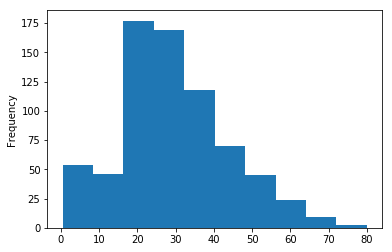

In [9]:
df['Age'].plot.hist()

In [12]:
df['Age Log'] = df['Age'].apply(np.log)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348


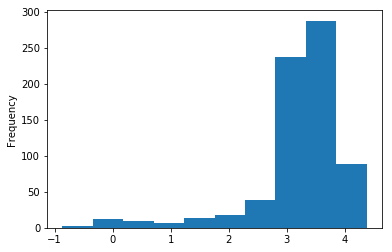

In [14]:
df['Age Log'].plot.hist()

### Reciprocal transformation

### Square root transformation

### Exponential transformation 

### Boxcox transformation

# Interaction Features

In [2]:
# Read the book for this

In [1]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [3]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [4]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


In [ ]:
obj_df = obj_df.fillna({"num_doors": "four"})

In [7]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [8]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [95]:
df = {'InvoiceNo': {42479: '539993', 42480: '539993', 42481: '539993', 42482: '539993', 42483: '539993', 541869: '581587', 541870: '581587', 541871: '581587', 541872: '581587', 541873: '581587'}, 'StockCode': {42479: '22386', 42480: '21499', 42481: '21498', 42482: '22379', 42483: '20718', 541869: '22613', 541870: '22899', 541871: '23254', 541872: '23255', 541873: '22138'}, 'Description': {42479: 'JUMBO BAG PINK POLKADOT', 42480: 'BLUE POLKADOT WRAP', 42481: 'RED RETROSPOT WRAP ', 42482: 'RECYCLING BAG RETROSPOT ', 42483: 'RED RETROSPOT SHOPPER BAG', 541869: 'PACK OF 20 SPACEBOY NAPKINS', 541870: "CHILDREN'S APRON DOLLY GIRL ", 541871: 'CHILDRENS CUTLERY DOLLY GIRL ', 541872: 'CHILDRENS CUTLERY CIRCUS PARADE', 541873: 'BAKING SET 9 PIECE RETROSPOT '}, 'Quantity': {42479: 10, 42480: 25, 42481: 25, 42482: 5, 42483: 10, 541869: 12, 541870: 6, 541871: 4, 541872: 4, 541873: 3}, 'UnitPrice': {42479: 1.95, 42480: 0.42, 42481: 0.42, 42482: 2.1, 42483: 1.25, 541869: 0.85, 541870: 2.1, 541871: 4.15, 541872: 4.15, 541873: 4.95}, 'Amount': {42479: 19.5, 42480: 10.5, 42481: 10.5, 42482: 10.5, 42483: 12.5, 541869: 10.2, 541870: 12.6, 541871: 16.6, 541872: 16.6, 541873: 14.85}, 'InvoiceDate': {42479: '04-01-11', 42480: '04-01-11', 42481: '04-01-11', 42482: '04-01-11', 42483: '04-01-11', 541869: '09-12-11', 541870: '09-12-11', 541871: '09-12-11', 541872: '09-12-11', 541873: '09-12-11'}, 'Day': {42479: 4, 42480: 4, 42481: 4, 42482: 4, 42483: 4, 541869: 9, 541870: 9, 541871: 9, 541872: 9, 541873: 9}, 'Month': {42479: 1, 42480: 1, 42481: 1, 42482: 1, 42483: 1, 541869: 12, 541870: 12, 541871: 12, 541872: 12, 541873: 12}, 'Year': {42479: 2011, 42480: 2011, 42481: 2011, 42482: 2011, 42483: 2011, 541869: 2011, 541870: 2011, 541871: 2011, 541872: 2011, 541873: 2011}, 'CustomerID': {42479: 13313.0, 42480: 13313.0, 42481: 13313.0, 42482: 13313.0, 42483: 13313.0, 541869: 12680.0, 541870: 12680.0, 541871: 12680.0, 541872: 12680.0, 541873: 12680.0}, 'Country': {42479: 'United Kingdom', 42480: 'United Kingdom', 42481: 'United Kingdom', 42482: 'United Kingdom', 42483: 'United Kingdom', 541869: 'France', 541870: 'France', 541871: 'France', 541872: 'France', 541873: 'France'}}

In [96]:
df.Quantity.value_counts().plot.pie(labels=df['Month'])
plt.show()

AttributeError: 'dict' object has no attribute 'Quantity'

In [ ]:
*args stands for OPTIONAL arguments that you could pass to it. Args come in tuples and are immutable.
** kwargs stands for OPTIONAL keyword arguments. Kwargs are dictionaries so you could mutate the values in it.
def foo(x, *args, **kwargs):
    kwargs['name'] = 'Alice' 
    new_args = args + ('extra', ) 
    bar(x, *new_args, **kwargs)

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth

In [6]:
%alias

Total number of aliases: 12


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -G -l %l | grep /$'),
 ('lf', 'ls -F -l -G %l | grep ^-'),
 ('lk', 'ls -F -l -G %l | grep ^l'),
 ('ll', 'ls -F -l -G'),
 ('ls', 'ls -F -G'),
 ('lx', 'ls -F -l -G %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir')]

In [ ]:
# Magic commands

%pdb
raise NotImplementedError()

%autosave 60

In [ ]:
%%latex
Some important equations:
$$E = mc^2$$
$$e^{i \pi} = -1$$